In [1]:
import pandas as pd
import glob
import os
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

c:\ProgramData\anaconda3\envs\electrophysiology\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
features = pd.read_csv('./all_cells_features.csv',index_col=1)

In [8]:
features = features.iloc[:,1:]

In [11]:
features = features.dropna()

In [12]:
features=features.apply(scipy.stats.zscore)
ephysTsneData = PCA().fit_transform(features.values)
ephysTsneData[:,:] /= np.std(ephysTsneData[:,0])
PCinit = PCA(n_components=2, svd_solver='full').fit_transform(features.values)
PCinit = PCinit / np.std(PCinit[:,0]) * 0.0001
Z = TSNE(init=PCinit, early_exaggeration=4, random_state=42).fit_transform(features.values)

In [13]:
plot_data = pd.DataFrame(Z,index=features.index)

<Axes: xlabel='0', ylabel='1'>

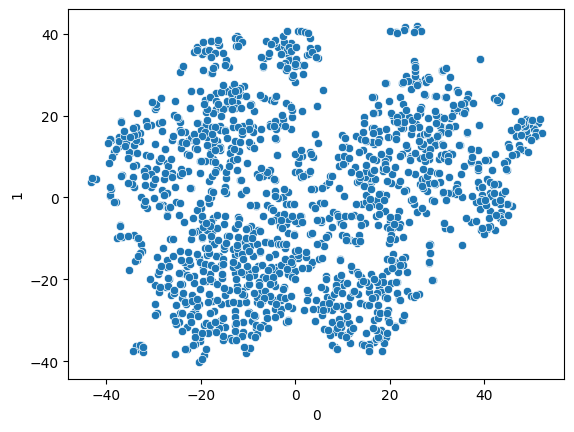

In [14]:
sns.scatterplot(plot_data,x=0,y=1)

In [17]:
for i in features.columns:
    plot_data[i]=features[i]

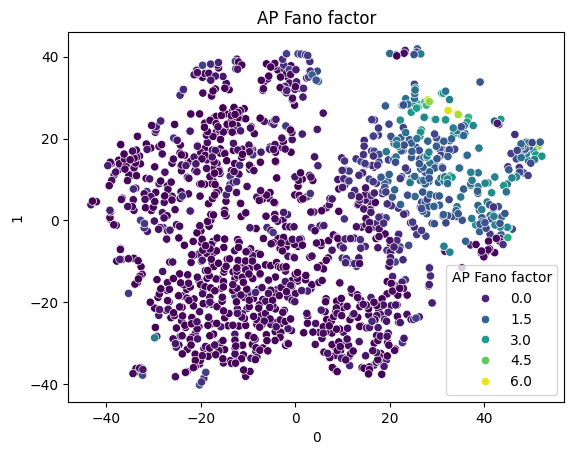

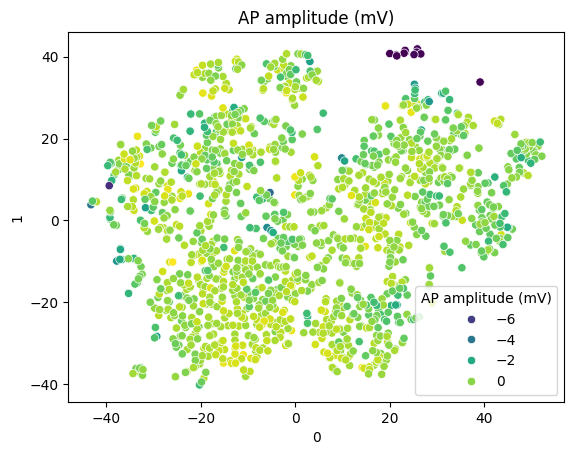

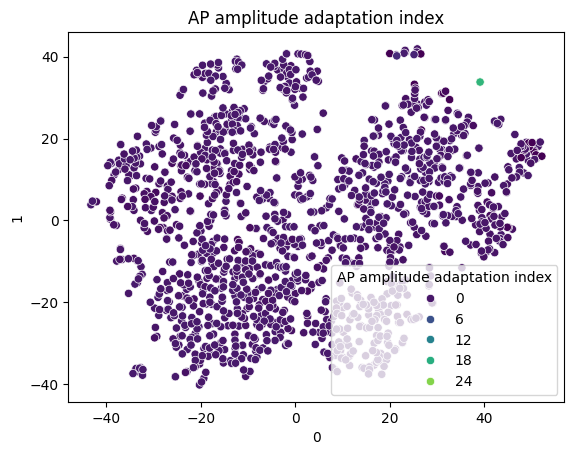

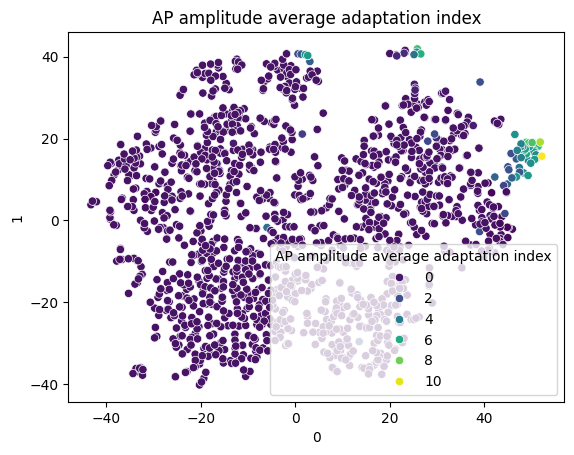

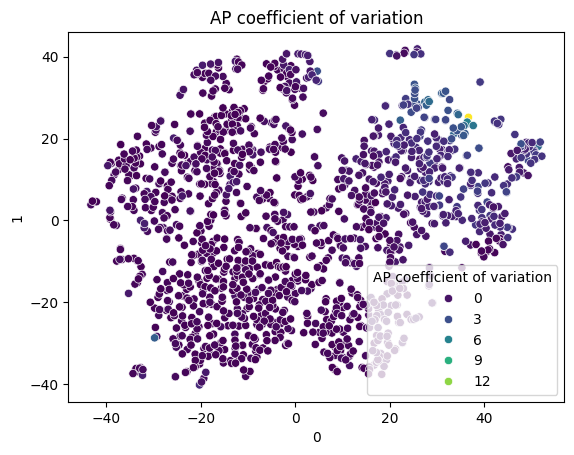

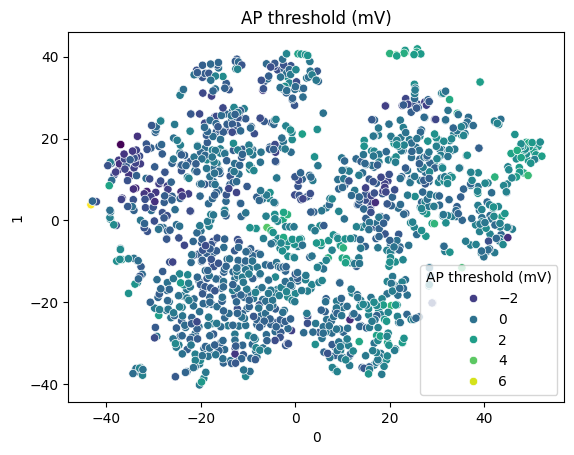

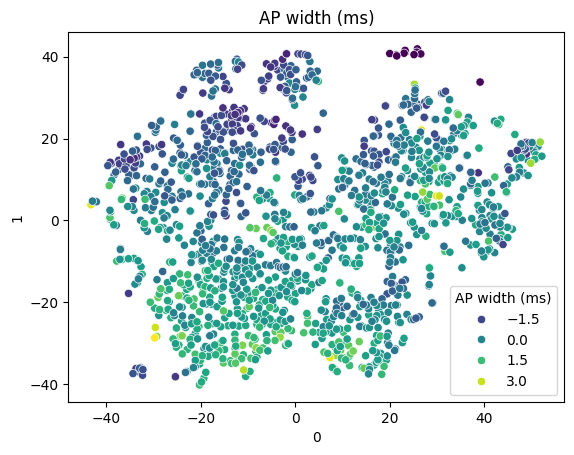

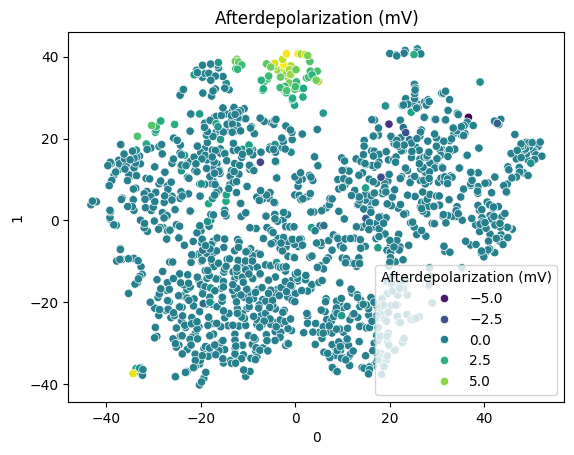

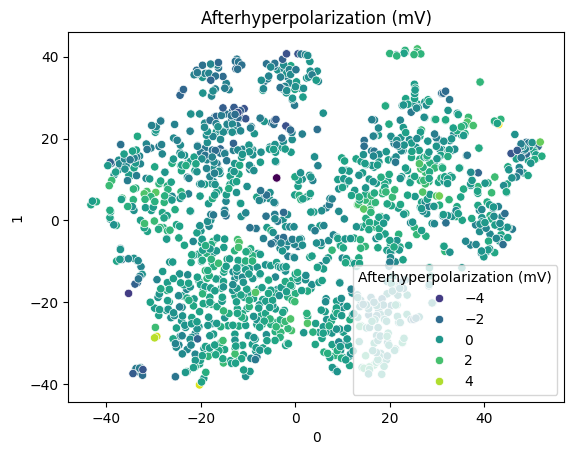

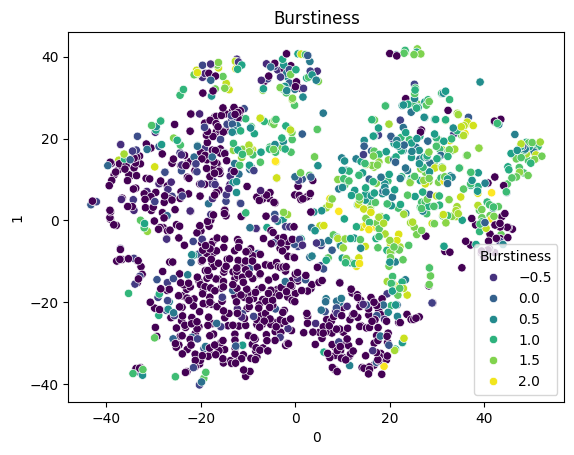

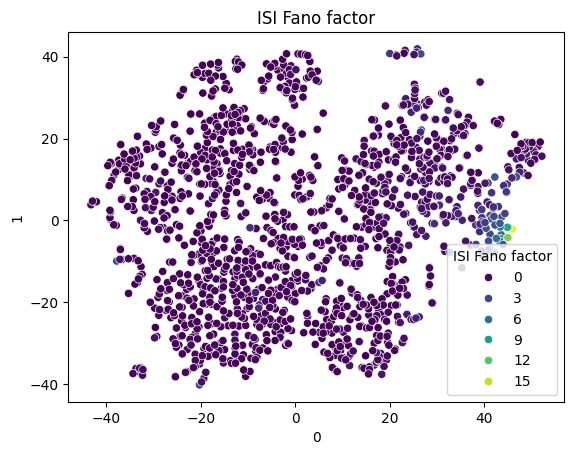

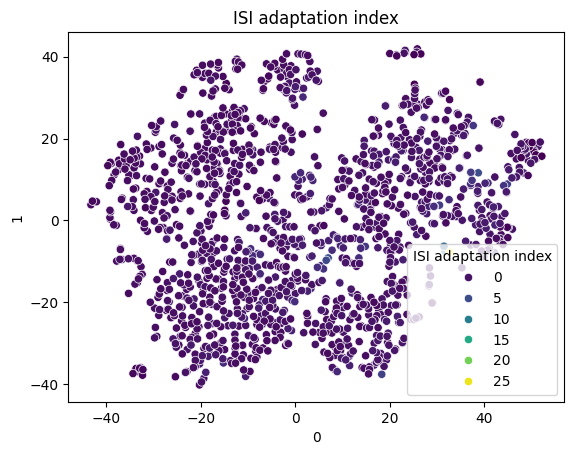

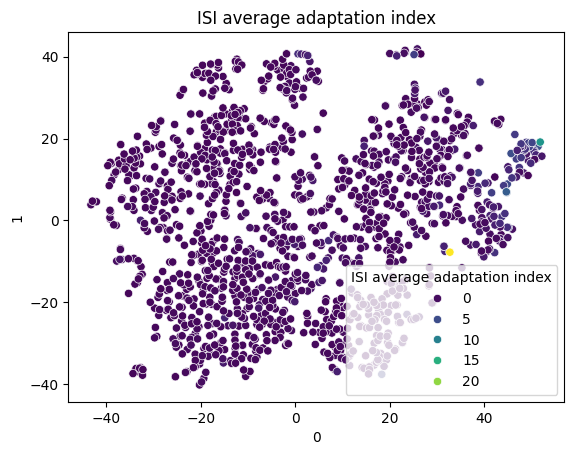

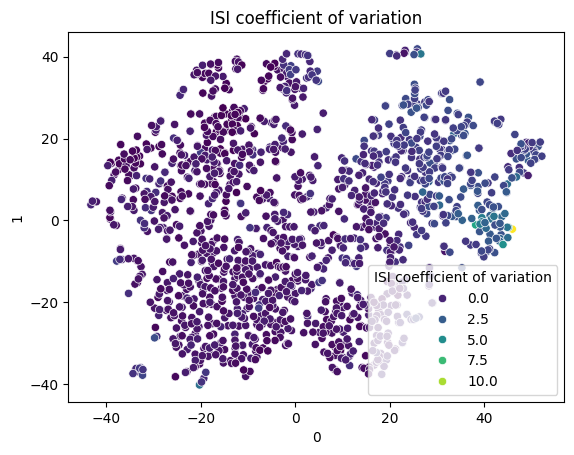

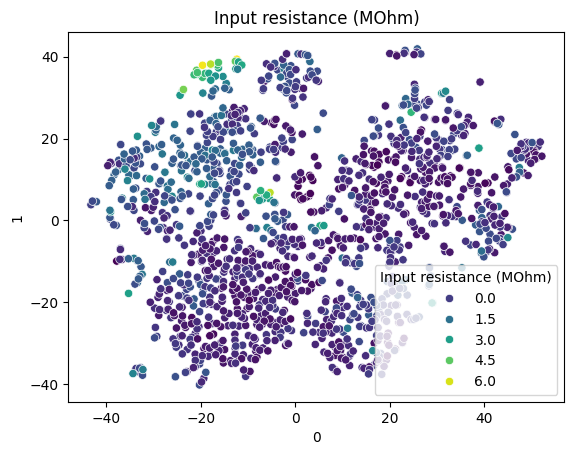

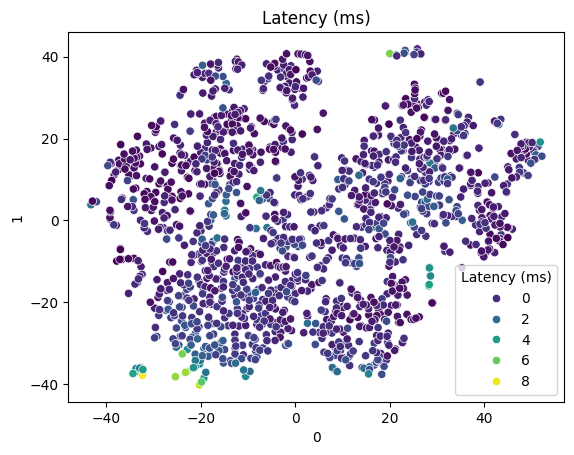

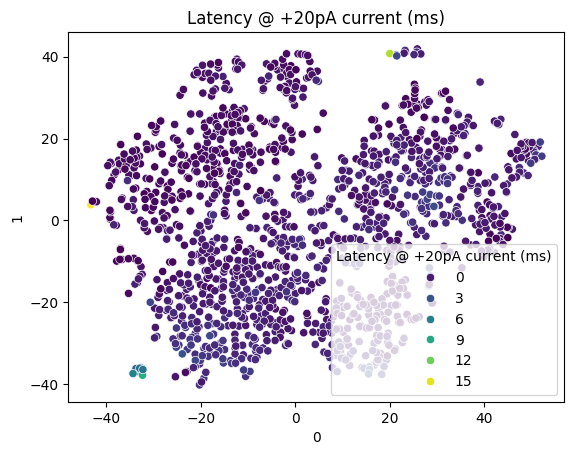

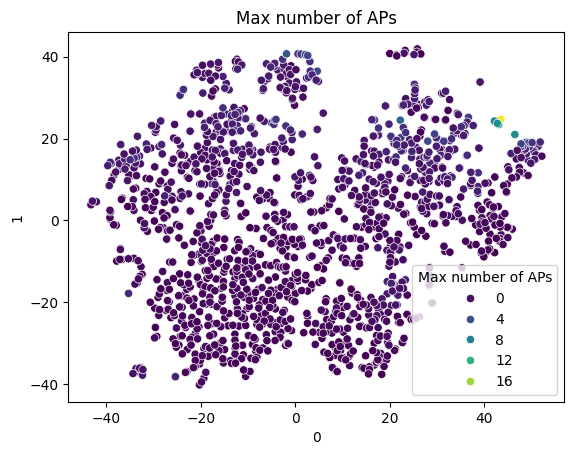

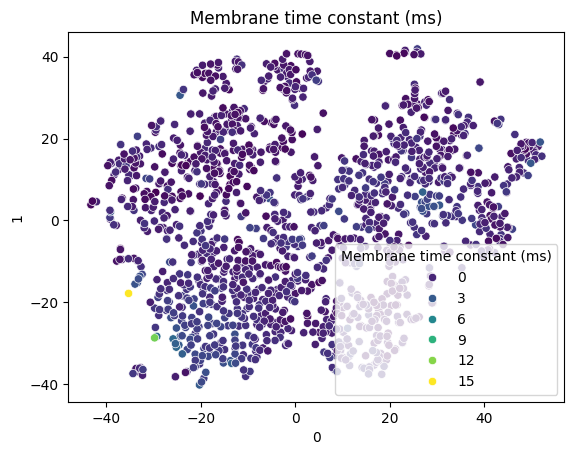

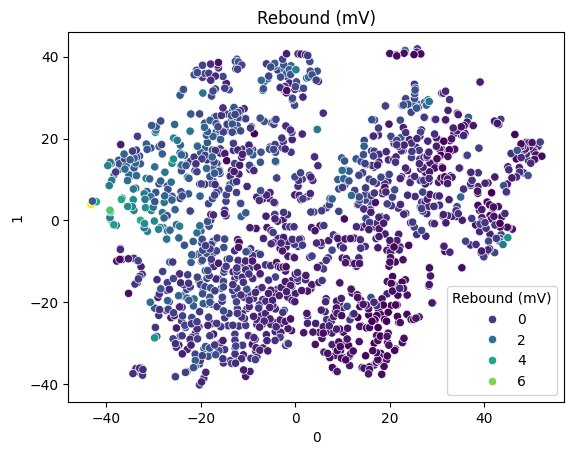

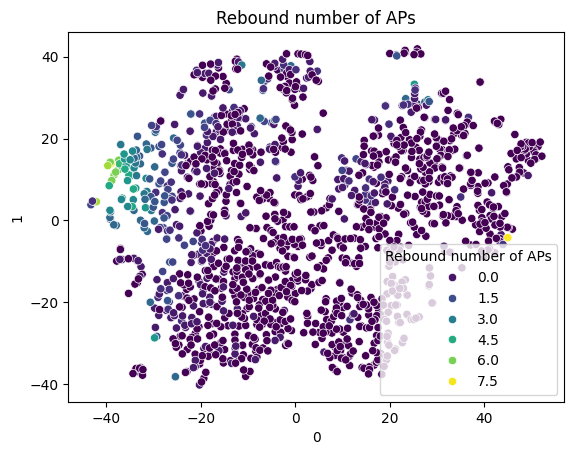

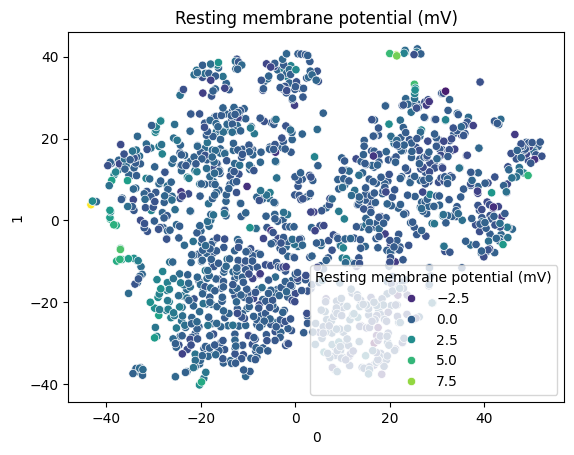

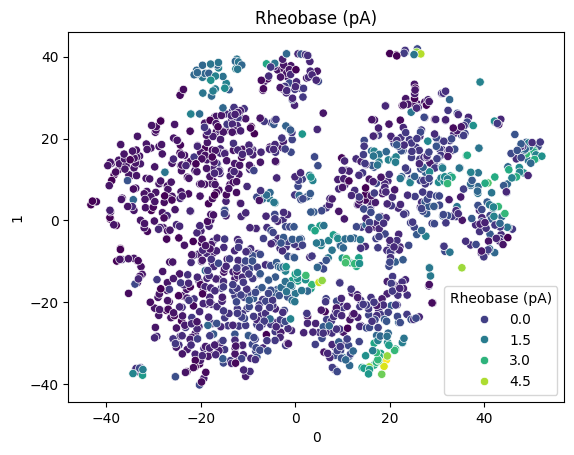

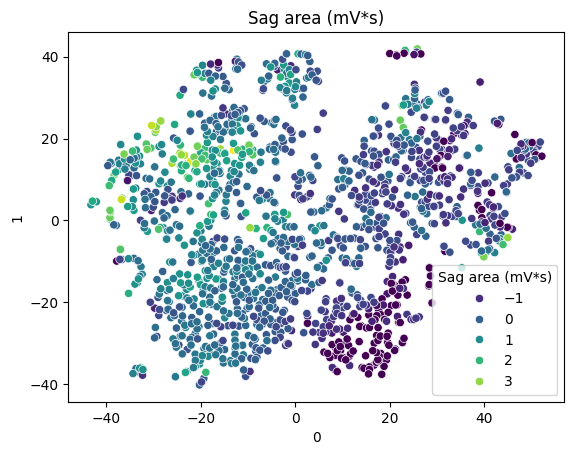

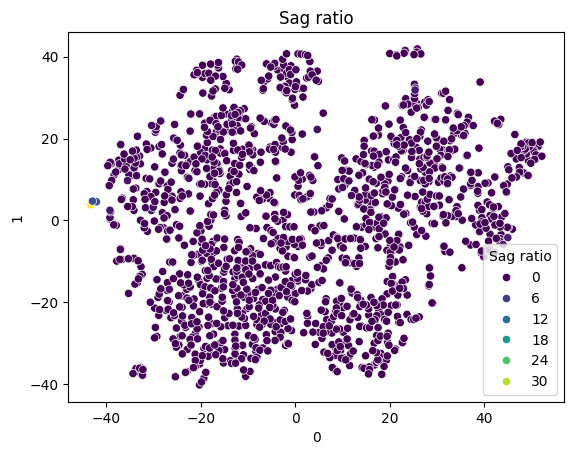

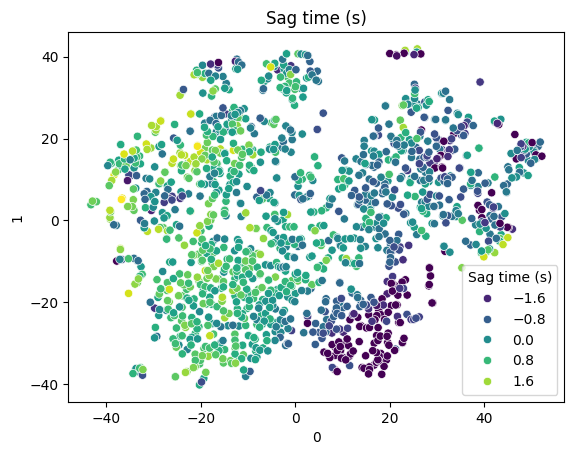

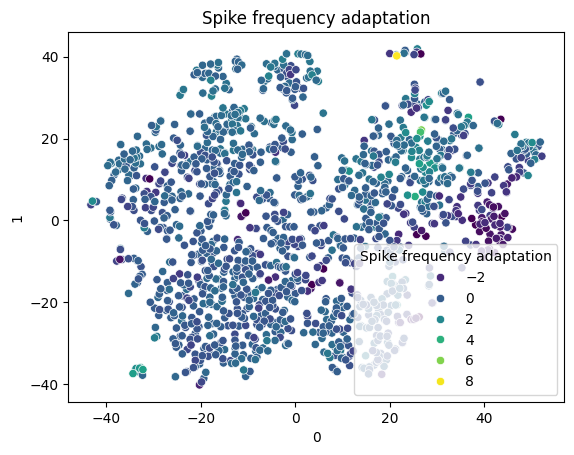

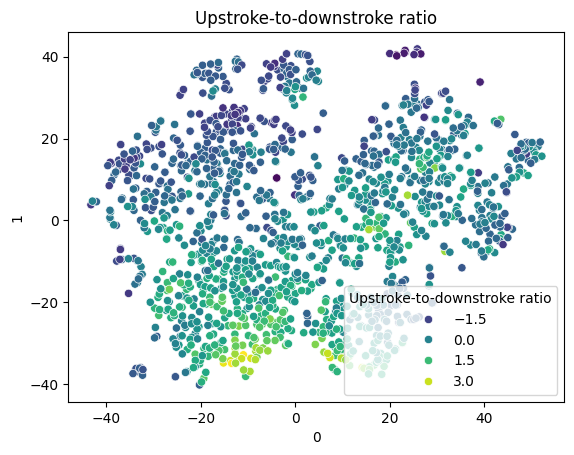

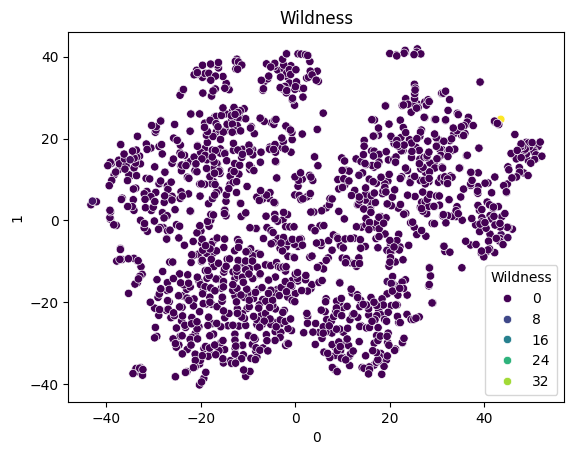

In [18]:
for i in features.columns:
    sns.scatterplot(plot_data,x=0,y=1,hue=i,palette='viridis')
    plt.title(i)
    plt.show()